In [ ]:
!pip install opencv-python


# HAARCASCADE

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Datasets for ML AI /Sample-image.webp')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
faces=face_cascade.detectMultiScale(gray,1.3,5)

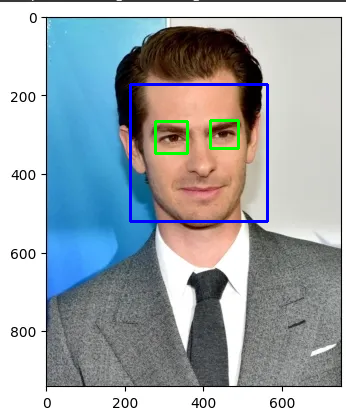

In [ ]:
for (x,y,w,h) in faces:
  img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray  = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]

  eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 5)
  for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0),2)

cv2_imshow(img)


# YOLO

In [ ]:
!pip install -q ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
path='/content/drive/MyDrive/Datasets for ML AI /Sample-image.webp'

In [ ]:
results = model.predict(source=path, conf=0.25, iou=0.45, imgsz=640)


image 1/1 /content/drive/MyDrive/Datasets for ML AI /Sample-image.webp: 640x544 1 person, 1 tie, 270.5ms
Speed: 6.0ms preprocess, 270.5ms inference, 27.1ms postprocess per image at shape (1, 3, 640, 544)


In [ ]:
r = results[0]

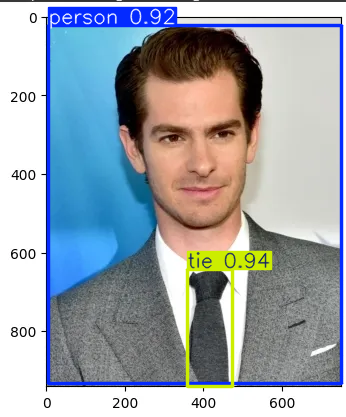

True

In [ ]:
vis = r.plot()               # draws boxes, labels, confidences on a copy
cv2_imshow(vis)              # display in Colab
cv2.imwrite("photo_yolo_out.jpg", vis)

In [ ]:
boxes = r.boxes            # Boxes object
xyxy = boxes.xyxy.cpu().numpy()   # [N, 4] -> x1,y1,x2,y2 per detection
confs = boxes.conf.cpu().numpy()  # [N]     -> confidence per detection
clses = boxes.cls.cpu().numpy()   # [N]     -> class id per detection
names = r.names            # dict: class_id -> class_name

for i in range(len(boxes)):
    x1, y1, x2, y2 = xyxy[i]
    cls_id = int(clses[i])
    conf = float(confs[i])
    label = names[cls_id]
    print(f"{label} {conf:.2f} at [{x1:.0f},{y1:.0f},{x2:.0f},{y2:.0f}]")

tie 0.94 at [187,269,232,386]
person 0.92 at [49,26,342,384]
